# Layer of Neurons and Batch of Data Using Numpy
From lecture 1, 1 layer of 3 neurons

In [1]:
import numpy as np

inputs = [ # Batch of inputs
    [1.0, 2.0, 3.0, 2.5], 
    [2.0, 5.0, -1.0, 2.0], 
    [-1.5, 2.7, 3.3, -0.8]
]
weights = np.array([
    [0.2, 0.8, -0.5, 1],
    [0.5, -0.91, 0.26, -0.5],
    [-0.26, -0.27, 0.17, 0.87]
])
biases = [2.0, 3.0, 0.5]

outputs = np.dot(inputs, weights.T) + biases
# For every row of inputs, compute the dot of input set and weights
print(outputs)

[[ 4.8    1.21   2.385]
 [ 8.9   -1.81   0.2  ]
 [ 1.41   1.051  0.026]]


# 2 Layers and Batch of Data Using Numpy
2 layers. Layer 1 and layer 2 have 3 neurons. Therefore, there are 3 final outputs.

There are 3 batches of input data to generate 3 total output arrays.

In [4]:
import numpy as np

inputs = [[1, 2, 3, 2.5],
          [2., 5., -1., 2],
          [-1.5, 2.7, 3.3, -0.8]]

weights = [[0.2, 0.8, -0.5, 1],
           [0.5, -0.91, 0.26, -0.5],
           [-0.26, -0.27, 0.17, 0.87]]

biases = [2, 3, 0.5]

weights2 = [[0.1, -0.14, 0.5],
            [-0.5, 0.12, -0.33],
            [-0.44, 0.73, -0.13]]

biases2 = [-1, 2, -0.5]

# Make the lists np.arrays so we can transpose them
inputs_array = np.array(inputs)
weights_array = np.array(weights)
biases_array = np.array(biases)
weights2_array = np.array(weights2)
biases2_array = np.array(biases2)

# Get the output of the first layer
layer1_outputs = np.dot(inputs_array, weights_array.T) + biases_array

# Feed the output of the first layer into the second layer with their own weights
layer2_outputs = np.dot(layer1_outputs, weights2_array.T) + biases2_array

print(layer2_outputs)

[[ 0.5031  -1.04185 -2.03875]
 [ 0.2434  -2.7332  -5.7633 ]
 [-0.99314  1.41254 -0.35655]]


# 4 Layers and Batch of Data Using Numpy
Cascading neural network with 4 layers. Layer 1 has 4 neurons, layer 2 has 3, layer 3 has 2 and layer 4 has a single output.

In [7]:
import numpy as np

# Batch of inputs
inputs = [
    [1, 2, 3, 2.5],
    [2., 5., -1., 2],
    [-1.5, 2.7, 3.3, -0.8]
]

# Weights are stored in a list of np.array
# index 0 = layer 1 weights and so on
weights = [
    np.array([  # Layer 1
        [0.2, 0.8, -0.5, 1],            # Neuron 1.1
        [0.5, -0.91, 0.26, -0.5],       # Neuron 1.2
        [-0.26, -0.27, 0.17, 0.87],     # Neuron 1.3
        [-0.27, 0.87, 0.2, 0.8],        # Neuron 1.4
    ]),
    np.array([  # Layer 2
        [0.1, 0.65, -0.24, 1.2],        # Neuron 2.1
        [0.51, -0.21, 0.206, -0.05],    # Neuron 2.2
        [-0.46, -0.67, 0.14, 0.37],     # Neuron 2.3
    ]),
    np.array([  # Layer 3
        [0.25, 0.4, -0.2],              # Neuron 3.1
        [0.58, -0.25, 0.26],            # Neuron 3.2
    ]),
    np.array([  # Layer 4
        [0.3, 0.1],                     # Neuron 4.1
    ])
]
biases = [
    [0.5, 2, 1, -2],                    # Layer 1
    [0.2, -0.6, 1.3,],                  # Layer 2
    [-1, 0.5,],                         # Layer 3
    [0.28],                             # Layer 4
]

# Iterate through each layer, get the output of the layer, use it as the input for the next layer
layer_inputs = inputs
layer_outputs = np.array([])
for layer in range(len(weights)):
    layer_weights = weights[layer]
    layer_biases = biases[layer]
    layer_outputs = np.dot(layer_inputs, layer_weights.T) + layer_biases
    
    # Update the inputs for the next layer based on the outputs of this layer
    layer_inputs = layer_outputs
# layer_outputs is left holding the final outputs of the network

print(layer_outputs)

[[0.47467235]
 [0.7219189 ]
 [0.0541053 ]]


# Generating Non Linear Training Data
Generate 2D training data, x and y

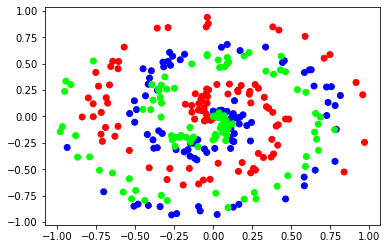

In [2]:
from nnfs.datasets import spiral_data
import numpy as np
import nnfs
nnfs.init()
import matplotlib.pyplot as plt
X, y = spiral_data(samples=100, classes=3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='brg')
plt.show()

# Dense Layer Class
Given number of neurons and inputs in the layer, predict the output by assigning weights and biases.

In [4]:
import numpy as np
import nnfs
from nnfs.datasets import spiral_data
nnfs.init()

class Layer_Dense:
    def __init__(self, n_inputs, n_neurons):
        # Initialize the weights and biases
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)  # Normal distribution of weights
        self.biases = np.zeros((1, n_neurons))

    def forward(self, inputs):
        # Calculate the output values from inputs, weights, and biases
        self.output = np.dot(inputs, self.weights) + self.biases        # Weights are already transposed

# Create a dataset
X, y = spiral_data(samples=100, classes=3)
# Create a dense layer with 2 inputs and 3 output values
dense1 = Layer_Dense(2, 3)
# Perform a forward pass of the dataset through the dense layer
dense1.forward(X)

# Print just the first few outputs
print(dense1.output[:5])


[[ 0.0000000e+00  0.0000000e+00  0.0000000e+00]
 [-1.0475188e-04  1.1395361e-04 -4.7983500e-05]
 [-2.7414842e-04  3.1729150e-04 -8.6921798e-05]
 [-4.2188365e-04  5.2666257e-04 -5.5912682e-05]
 [-5.7707680e-04  7.1401405e-04 -8.9430439e-05]]


# Python Array Summation

In [4]:
import numpy as np

A = [
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
]

# Sum the elements in the array resulting in a scalar
print(np.sum(A))

# Sum the rows resulting in a row vector
'''
  [1, 2, 3]
+ [4, 5, 6]
+ [7, 8, 9]
= [12, 15, 18]
'''
print(np.sum(A, axis=0))

# Sum the columns resulting in a column vector
'''
1   +   2   +   3   =   6
4   +   5   +   6   =   15
7   +   8   +   9   =   24
'''
print(np.sum(A, axis=1))

# keepdims will keep the dimension of A
print(np.sum(A, axis=0, keepdims=True))
print(np.sum(A, axis=1, keepdims=True))

45
[12 15 18]
[ 6 15 24]
[[12 15 18]]
[[ 6]
 [15]
 [24]]


# Python Array Broadcasting Rules
Check if arrays are broadcastable by scanning right to left for their dimensions. If they share the sime size in that dimension, either of them is size 1, or one size does not exist, continue left.

Given A is 3x3 and B is 3x3, check if it is broadcastable.

3 x 3

3 x 1

Start by comparing 3 and 1. This is fine because B has size 1.

Move to 3 and 3. This is fine because they are equal. The arrays are broadcastable.

Once the arrays are deemed broadcastable, Python will maniupulate one or the other to perform the operation.

In [13]:
import numpy as np

A = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
])  # 3 x 3

B = np.array([
    [1],
    [2],
    [3]
])  # 3 x 1

print(A+B)

# Adding the arrays will broadcast B into a 3x3 in order to add them.
B_broadcast = np.array([
    [1, 1, 1],
    [2, 2, 2],
    [3, 3, 3]
])  # 3 x 1

print(A+B_broadcast)

# Example
# Take each row and subtract the maximum value from the row
A = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
])  # 3 x 3

# Gets the max value in each row by comparing columns (axis1). Use keepdims so it is a column vector
result = A - np.max(A, axis=1, keepdims=True)
print(result)


[[ 2  3  4]
 [ 6  7  8]
 [10 11 12]]
[[ 2  3  4]
 [ 6  7  8]
 [10 11 12]]
[[-2 -1  0]
 [-2 -1  0]
 [-2 -1  0]]


# Activation Function: ReLU
Rectified Linear Unit. Only passes through positive values.

y = max(0, x)

In [ ]:
class Activation_ReLU:
    def forward(self, inputs):
        self.output = np.maximum(0, inputs)

In [3]:
import numpy as np
import nnfs
from nnfs.datasets import spiral_data
nnfs.init()

class Layer_Dense:
    def __init__(self, n_inputs, n_neurons):
        # Initialize the weights and biases
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)  # Normal distribution of weights
        self.biases = np.zeros((1, n_neurons))

    def forward(self, inputs):
        # Calculate the output values from inputs, weights, and biases
        self.output = np.dot(inputs, self.weights) + self.biases        # Weights are already transposed

class Activation_ReLU:
    def forward(self, inputs):
        self.output = np.maximum(0, inputs)

# Create a dataset
X, y = spiral_data(samples=100, classes=3)

# Create a dense layer with 2 inputs and 3 output values
dense1 = Layer_Dense(2, 3)

# Create ReLU activation
activation1 = Activation_ReLU()

# Perform a forward pass of the dataset through the dense layer
dense1.forward(X)

# Pass the output from the layer through the ReLU activation function
activation1.forward(dense1.output)

# Print just the first few outputs from ReLU
print(activation1.output[:5])



[[0.         0.         0.        ]
 [0.         0.00011395 0.        ]
 [0.         0.00031729 0.        ]
 [0.         0.00052666 0.        ]
 [0.         0.00071401 0.        ]]


# Activation Function: Softmax
Output falls between (0, 1) and relates the output as a probability.

Given 3 outputs o1, o2, o3, oi = e^{oi} / (e^{o1} + e^{o2} + e^{o3})

Sum of the outputs is 1.


In [ ]:
class Activation_Softmax:
    def forward(self, inputs):
        # Get the unnormalized probabilities
        # Subtract max from the row to prevent larger numbers
        exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))

        # Normalize the probabilities
        probabilities = exp_values / np.sum(exp_values, axis=1,keepdims=True)
        self.output = probabilities

In [4]:
import numpy as np
import nnfs
from nnfs.datasets import spiral_data
nnfs.init()

class Layer_Dense:
    def __init__(self, n_inputs, n_neurons):
        # Initialize the weights and biases
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)  # Normal distribution of weights
        self.biases = np.zeros((1, n_neurons))

    def forward(self, inputs):
        # Calculate the output values from inputs, weights, and biases
        self.output = np.dot(inputs, self.weights) + self.biases        # Weights are already transposed

class Activation_ReLU:
    def forward(self, inputs):
        self.output = np.maximum(0, inputs)
        
class Activation_Softmax:
    def forward(self, inputs):
        # Get the unnormalized probabilities
        # Subtract max from the row to prevent larger numbers
        exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))

        # Normalize the probabilities with element wise division
        probabilities = exp_values / np.sum(exp_values, axis=1,keepdims=True)
        self.output = probabilities

# Create dataset
X, y = spiral_data(samples=100, classes=3)

dense1 = Layer_Dense(2, 3)
activation1 = Activation_ReLU()
dense2 = Layer_Dense(3, 3)
activation2 = Activation_Softmax()

# Make a forward pass of our training data through this layer
dense1.forward(X)

# Make a forward pass through activation function
activation1.forward(dense1.output)
# Make a forward pass through second Dense layer
dense2.forward(activation1.output)
# Make a forward pass through activation function
activation2.forward(dense2.output)
# Let's see output of the first few samples:
print(activation2.output[:5])

[[0.33333334 0.33333334 0.33333334]
 [0.33333316 0.3333332  0.33333364]
 [0.33333287 0.3333329  0.33333418]
 [0.3333326  0.33333263 0.33333477]
 [0.33333233 0.3333324  0.33333528]]
